# Q-2 Numerical Verification of Bifurcations Using Euler's Method





In [7]:
%matplotlib notebook
%matplotlib inline



---
## Part (a): Saddle-Node Bifurcation
---

 ## What is  Saddle-Node Bifurcation and the Approach we took to solve the question

**System:** $\frac{dx}{dt} = r - x^2$

**What is a saddle-node bifurcation?**  
A saddle-node (or fold) bifurcation occurs when two fixed points (one stable, one unstable) coalesce and annihilate as a parameter is varied. On one side of the bifurcation there are two equilibria; on the other there are none. The bifurcation is characterized by a *tangent* (quadratic) contact of the flow with the line of fixed points in parameter space.

**Fixed points:**  
Setting $dx/dt = 0$ gives $r - x^2 = 0$, so $x^* = \pm\sqrt{r}$ (real only when $r \geq 0$).

- For **r < 0**: No real fixed points.
- For **r = 0**: One fixed point at $x^* = 0$ (semi-stable).
- For **r > 0**: Two fixed points: $x^* = +\sqrt{r}$ (stable) and $x^* = -\sqrt{r}$ (unstable). Stability follows from $\frac{\partial}{\partial x}(r - x^2) = -2x$: negative at $x = +\sqrt{r}$, positive at $x = -\sqrt{r}$.

**Analytical condition for bifurcation at r = 0:**  
The bifurcation occurs when the number of fixed points changes. Here, $r = 0$ is the critical value: the two branches $x^* = \pm\sqrt{r}$ meet at $x^* = 0$ when $r = 0$, and for $r < 0$ no real equilibria exist. So the bifurcation point is **r = 0**.

### Euler's Method: 

We implement a general Euler solver for the scalar ODE $dx/dt = f(x, r)$, with fixed timestep and flexible initial condition.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


def euler(f, x0, r, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros(len(t))
    x[0] = x0
    
    for i in range(len(t)-1):
        x[i+1] = x[i] + dt * f(x[i], r)
        
        if abs(x[i+1]) > 50:   # limit explosion
            x[i+1:] = np.nan
            break
            
    return t, x


def f_saddle(x, r):
    return r - x**2


### Saddle-Node: Trajectories for r = -1.1, r = 0, r = 1.1

We define the RHS $f(x,r) = r - x^2$, choose multiple initial conditions for each $r$, and plot trajectories.

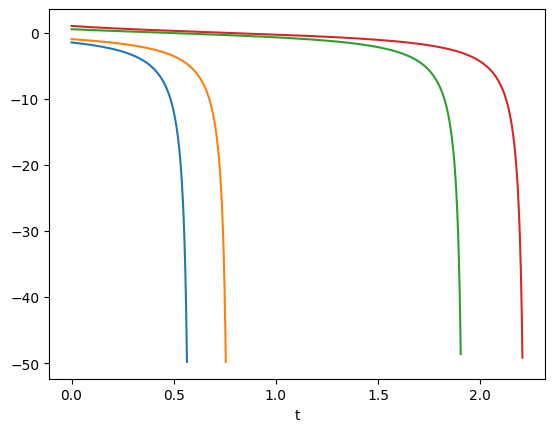

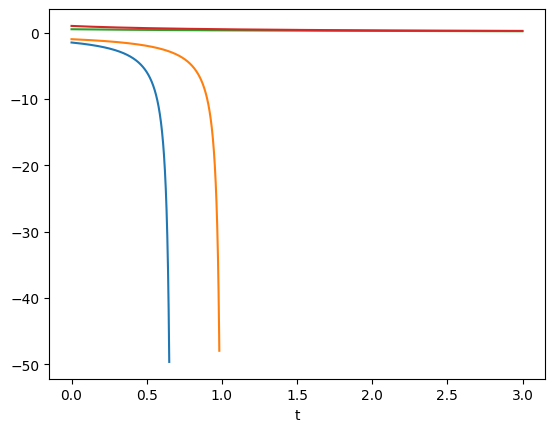

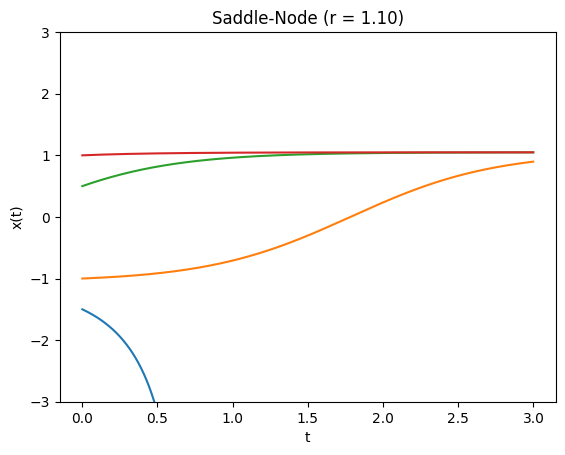

In [11]:
dt = 0.001
T = 3
initial_conditions = [-1.5, -1, 0.5, 1]


r_values = [-1.1, 0, 1.1]

for r in r_values:
    plt.figure()
    for x0 in initial_conditions:
        t, x = euler(f_saddle, x0, r, dt, T)
        plt.plot(t, x, label=f"x0 = {x0}")
      
    plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(f"Saddle-Node (r = {r:.2f})")
plt.ylim(-3,3)
plt.show()



### Saddle-Node: Interactive Slider (r from -2 to 2)

One figure, one plot; slider varies $r$. Trajectories update dynamically. 

In [8]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot_system(r):
    plt.clf()   # clear previous plot
    
    for x0 in initial_conditions:
        t, x = euler(f_saddle, x0, r, dt, T)
        plt.plot(t, x)
        
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title(f"Saddle-Node Bifurcation (r = {r:.2f})")
    plt.show()

plt.figure()
interact(plot_system, r=(-2, 2, 0.1))


interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.plot_system(r)>

---
## Part (b): Transcritical Bifurcation
---

### Transcritical Bifurcation And Our Approach to Solve The Problem

**System:** $\frac{dx}{dt} = r x - x^2 = x(r - x)$

**What is a transcritical bifurcation?**  
In a transcritical bifurcation, two branches of fixed points exist on both sides of the critical parameter value. They *cross* at the bifurcation point and **exchange stability**: the formerly stable equilibrium becomes unstable and the formerly unstable one becomes stable. So the number of fixed points does not change (unlike the saddle-node), but their stability does.

**Equilibrium points:**  
Setting $dx/dt = 0$ gives $x(r - x) = 0$, so $x^* = 0$ or $x^* = r$.

**Stability:**  
Linearization: $f(x) = rx - x^2 \Rightarrow f'(x) = r - 2x$.

- At $x^* = 0$: $f'(0) = r$. So $x^* = 0$ is stable for $r < 0$ and unstable for $r > 0$.
- At $x^* = r$: $f'(r) = r - 2r = -r$. So $x^* = r$ is unstable for $r < 0$ and stable for $r > 0$.

**Exchange of stability at r = 0:**  
At $r = 0$ the two equilibria coincide at $x^* = 0$. For $r < 0$, $x^* = 0$ is stable and $x^* = r$ is unstable; for $r > 0$, $x^* = 0$ is unstable and $x^* = r$ is stable. Thus at $r = 0$ the two branches cross and swap stability—this is the transcritical bifurcation.

### Transcritical: Trajectories for r = -1.1, r = 0, r = 1.1

Same Euler solver; RHS $f(x,r) = r x - x^2$. One figure per $r$.

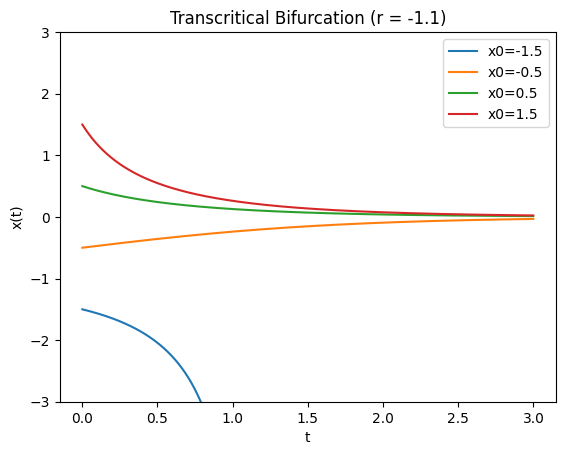

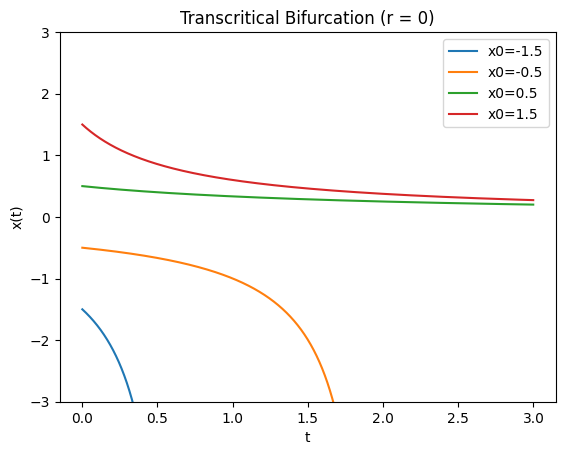

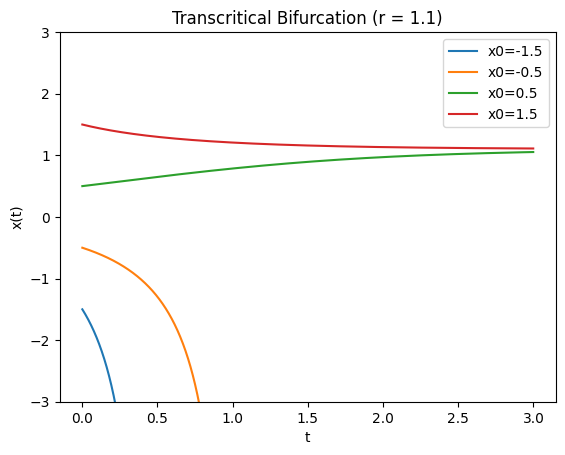

In [13]:
def euler(f, x0, r, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros(len(t))
    x[0] = x0
    
    for i in range(len(t)-1):
        x[i+1] = x[i] + dt * f(x[i], r)
        
        # stop explosion
        if abs(x[i+1]) > 20:
            x[i+1:] = np.nan
            break
            
    return t, x

def f_transcritical(x, r):
    return r*x - x**2

dt = 0.001
T = 3
initial_conditions = [-1.5, -0.5, 0.5, 1.5]


r_values = [-1.1, 0, 1.1]

for r in r_values:
    plt.figure()
    
    for x0 in initial_conditions:
        t, x = euler(f_transcritical, x0, r, dt, T)
        plt.plot(t, x, label=f"x0={x0}")
    
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title(f"Transcritical Bifurcation (r = {r})")
    plt.ylim(-3, 3)   # prevent scaling issue
    plt.legend()
    plt.show()


### Transcritical: Interactive Slider (r from -2 to 2)

One figure, one plot; slider varies $r$. Same styling as saddle-node (matplotlib only, one plot per figure).

In [ ]:
from ipywidgets import interact

def plot_transcritical(r):
    plt.clf()
    
    for x0 in initial_conditions:
        t, x = euler(f_transcritical, x0, r, dt, T)
        plt.plot(t, x)
    
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title(f"Transcritical Bifurcation (r = {r:.2f})")
    plt.ylim(-3, 3)
    plt.show()

plt.figure()
interact(plot_transcritical, r=(-2, 2, 0.1))


interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.plot_transcritical(r)>

---
## Summary: Numerical Observation of Bifurcations
---

**Saddle-node:**  
- For **r < 0** (e.g. r = -1.1), there are no fixed points; all trajectories diverge (to $-\infty$ for positive $x_0$, or evolve according to $r - x^2$). Numerically we see no equilibria to converge to.
- At **r = 0**, a single semi-stable fixed point appears at $x = 0$; trajectories from $x_0 > 0$ approach it from above, from $x_0 < 0$ from below (or drift).
- For **r > 0** (e.g. r = 1.1), two fixed points appear at $x = \pm\sqrt{r}$. Trajectories converge to $+\sqrt{r}$ (stable) or move away from $-\sqrt{r}$ (unstable), in agreement with the analytical bifurcation at **r = 0**.

**Transcritical:**  
- For **r < 0** (e.g. r = -1.1), equilibria at $x^* = 0$ (stable) and $x^* = r$ (unstable). Trajectories are attracted to 0 or repelled from $r$, as seen in the plots.
- At **r = 0**, the two equilibria merge at $x = 0$ (semi-stable).
- For **r > 0** (e.g. r = 1.1), $x^* = 0$ becomes unstable and $x^* = r$ becomes stable. Numerically we see trajectories converging to $r$ and diverging from 0, confirming the **exchange of stability** at **r = 0**.

Using Euler's method with a small timestep (e.g. dt = 0.01) and multiple initial conditions, we therefore **numerically verify** that the bifurcation occurs at **r = 0** in both systems, and that the qualitative behavior (saddle-node: creation/annihilation of two equilibria; transcritical: two equilibria that cross and swap stability) matches the theory.